Prepared By [Izam Mohammed](https://github.com/izam-mohammed) 😊. Follow for more ❤️.

## Importing neccessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression , LogisticRegression, Ridge, Lasso, ElasticNet, Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA

%matplotlib inline

## Linear Regression

In [ ]:
# Independent variables

X = np.array([
    [1,1],
    [1,2],
    [2,2],
    [2,3]
])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [ ]:
#checking the shape of X

X.shape

(4, 2)

In [ ]:
# Dependent variable

# y = 1 * x_0 + 2 * x_1 + 3
y = np.array([6, 8, 9, 11])
y

array([ 6,  8,  9, 11])

In [ ]:
# checking the shape of dependent variable

y.shape

(4,)

In [ ]:
# creating model

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# checking the r2 score of model

model.score(X, y)

1.0

In [ ]:
# cheking the coefficieant of the model (weight for each features)
# shape = (1, no of features)

model.coef_

array([1., 2.])

In [ ]:
# checking the intercept , it will be a constant

model.intercept_

3.0000000000000018

In [ ]:
# testing data

pred_x = np.array([
    [3,5]
])

pred_x.shape

(1, 2)

In [ ]:
# predicting with the model

model.predict(pred_x)

array([16.])

In [ ]:
# checking the parameters of the model

model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

**from scratch ....**

In [ ]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [ ]:
X.shape

(4, 2)

In [ ]:
y

array([ 6,  8,  9, 11])

In [ ]:
y.shape

(4,)

In [ ]:
# setting some constants for the model

no_data_points, no_features = X.shape # determine the no of features and no of data points
learning_rate = 0.05
num_iterations = 10000
weights = np.zeros(no_features) # just an assumption
bias = 0

In [ ]:
weights # there is 2 features

array([0., 0.])

In [ ]:

# a sample y calculation

sample = np.dot(X, weights) + bias
sample

array([0., 0., 0., 0.])

In [ ]:
# checking diemention of sample y

sample.ndim

1

In [ ]:
# sample gradient of weights

1/no_data_points * np.dot(X.T, sample)

array([0., 0.])

In [ ]:
# gradient descent

for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias # shape = (n,) , it is 1d

  error = linear_model - y # determining the error
  error_applied_to_features = np.dot(X.T, error) # applying error to each samples

  gradient_weights = (1/ no_data_points) * error_applied_to_features
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias

  if i % 250 == 0:

    print(weights, bias)

[0.675  0.9125] 0.42500000000000004
[1.36254616 2.05956524] 2.2813863039425395
[1.16345049 2.00479443] 2.7243771937702874
[1.07029926 1.99711356] 2.892303492400015
[1.02947473 1.9976262 ] 2.957396210070804
[1.01217917 1.99873846] 2.9830110565274173
[1.00498938 1.9994145 ] 2.993190807804605
[1.00203341 1.99974442] 2.9972620965988623
[1.00082611 1.99989196] 2.998896905488266
[1.00033497 1.99995514] 2.999555009385644
[1.00013567 1.99998157] 2.9998203501586116
[1.0000549  1.99999248] 2.9999274374566176
[1.00002221 1.99999694] 2.9999706824184407
[1.00000898 1.99999876] 2.9999881525653462
[1.00000363 1.9999995 ] 2.9999952118209894
[1.00000147 1.9999998 ] 2.9999980647043656
[1.00000059 1.99999992] 2.9999992177539596
[1.00000024 1.99999997] 2.99999968380772
[1.0000001  1.99999999] 2.999999872189513
[1.00000004 1.99999999] 2.9999999483362103
[1.00000002 2.        ] 2.9999999791162364
[1.00000001 2.        ] 2.9999999915582394
[1. 2.] 2.9999999965876114
[1. 2.] 2.999999998620618
[1. 2.] 2.999999

In [ ]:
weights

array([1., 2.])

In [ ]:
bias

2.9999999999999485

## Polynomial Regression

Just create the polynomial features and make a regression model out of it.

In [ ]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [ ]:
y

array([ 6,  8,  9, 11])

In [ ]:
# making polynomial fetures

degree = 2 # define the degree
X_poly = X.copy()

for d in range(2, degree+1):
  X_poly = np.concatenate((X_poly, X ** d), axis=1)

X_poly

array([[1, 1, 1, 1],
       [1, 2, 1, 4],
       [2, 2, 4, 4],
       [2, 3, 4, 9]])

In [ ]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [ ]:
model_poly.score(X_poly, y)

1.0

**With sklearn**

In [ ]:
poly = PolynomialFeatures(degree=2) # polynomial features from [a, b] are [1, a, b, a^2, ab, b^2]
X_poly = poly.fit_transform(X)

In [ ]:
model_sk_poly = LinearRegression()
model_sk_poly.fit(X_poly, y)

LinearRegression()

## Ridge Regression (L2 regularization)

In [ ]:
# sample data

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [ ]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X, y)

Ridge(alpha=0.1)

In [ ]:
model.coef_

array([ 1.38841176, -0.13888097, -1.03886657,  0.05768279,  1.86953792])

In [ ]:
model.intercept_

1.2634260865654503

**from scratch**

In [ ]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [ ]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [ ]:
# setting some constants for the model

no_data_points, no_features = X.shape # determine the no of features and no of data points
learning_rate = 0.05
num_iterations = 10000
weights = np.zeros(no_features) # just an assumption
bias = 0
alpha  = 1 # for ridge

In [ ]:
# gradient descent for l2 regularization

for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias # shape = (n,) , it is 1d

  error = linear_model - y # determining the error
  error_applied_to_features = np.dot(X.T, error) # applying error to each features

  gradient_weights = (1/ no_data_points) * error_applied_to_features + alpha * weights
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias


In [ ]:
weights

array([-0.01619386,  0.03590094, -0.19016441,  0.10871254,  0.21918176])

In [ ]:
bias

0.7207358088908956

## Lasso (L1 regularization)

In [ ]:
X, y = np.array([[0,0], [1, 1], [2, 2]]), np.array([0, 1, 2])
X

array([[0, 0],
       [1, 1],
       [2, 2]])

In [ ]:
y

array([0, 1, 2])

In [ ]:
model = Lasso(alpha=0.1)
model.fit(X, y)

Lasso(alpha=0.1)

In [ ]:
model.coef_

array([0.85, 0.  ])

In [ ]:
model.intercept_

0.15000000000000002

**from scratch**

In [ ]:
# setting some constants for the model

no_data_points, no_features = X.shape # determine the no of features and no of data points
learning_rate = 0.05
num_iterations = 10000
weights = np.zeros(no_features) # just an assumption
bias = 0
alpha  = 1 # for lasso

In [ ]:
# gradient descent for l1 regularization

for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias # shape = (n,) , it is 1d

  error = linear_model - y # determining the error
  error_applied_to_features = np.dot(X.T, error) # applying error to each features

  gradient_weights = (1/ no_data_points) * error_applied_to_features + alpha * np.sign(weights)
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias


In [ ]:
weights

array([-0.01223224, -0.01223224])

In [ ]:
bias

0.9325660894080405

## Elastic Net regression

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)

In [ ]:
print(f'shape = {X.shape}')

X[:6]

shape = (100, 2)


array([[ 1.46935877,  1.53277921],
       [-1.60205766,  0.62523145],
       [-1.34775906,  1.8831507 ],
       [ 1.22244507, -0.40317695],
       [ 1.5430146 , -0.739563  ],
       [ 0.70657317,  0.3563664 ]])

In [ ]:
print(y.shape)
y[:6]

(100,)


array([190.37056172,  13.33956959, 141.77266854,  -3.06962683,
       -26.06246526,  54.92254051])

In [ ]:
alpha = 0.5 #mixing  parameter
enet_model = ElasticNet(random_state=0)
enet_model.fit(X, y)

ElasticNet(random_state=0)

In [ ]:
enet_model.coef_

array([18.83816048, 64.55968825])

In [ ]:
enet_model.intercept_

1.4512607561653996

In [ ]:
y_pred = enet_model.predict(X)

In [ ]:
# scores

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1139.8821889622166
R-squared: 0.8904453086976037


**from scratch**

In [ ]:
# setting some constants for the model

no_data_points, no_features = X.shape # determine the no of features and no of data points
learning_rate = 0.05
num_iterations = 10000
weights = np.zeros(no_features) # just an assumption
bias = 0
alpha  = 1 # for lasso
mixing = 0.5 # mixing ratio

In [ ]:
# gradient descent

for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias # shape = (n,) , it is 1d

  error = linear_model - y # determining the error
  error_applied_to_features = np.dot(X.T, error) # applying error to each features

  gradient_weights = (1/ no_data_points) * error_applied_to_features + alpha * ((1 - mixing)*weights + mixing * np.sign(weights))
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias

In [ ]:
weights

array([18.83816055, 64.55968825])

In [ ]:
bias

1.4512607458342257

## Logistic Regression

<img src='https://saedsayad.com/images/LogReg_1.png' height=300/>

Just like linear regression, but will apply a sigmoid function which tranfom output into (0 ,1)

equation for sigmoid -

In [ ]:
data = np.array([
    [34.62365962, 78.02469282, 0],
    [30.28671077, 43.89499752, 0],
    [35.84740877, 72.90219803, 0],
    [60.18259939, 86.3085521, 1],
    [79.03273605, 75.34437644, 1],
    [45.08327748, 56.31637178, 0],
    [61.10666454, 96.51142588, 1],
    [75.02474557, 46.55401354, 1],
    [76.0987867, 87.42056972, 1],
    [84.43281996, 43.53339331, 1]
])

X = data[:, :-1]  # Features (exam scores)
y = data[:, -1]   # Labels (0 or 1)

In [ ]:
model = LogisticRegression(random_state=0).fit(X ,y)

In [ ]:
model.intercept_

array([-28.75319413])

In [ ]:
model.coef_

array([[0.37237634, 0.12955234]])

In [ ]:
model.predict(X)

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.])

In [ ]:
model.predict_log_proba(X)

array([[-3.17176515e-03, -5.75505248e+00],
       [-7.59178671e-06, -1.17884474e+01],
       [-2.57706151e-03, -5.96239373e+00],
       [-4.84674215e+00, -7.88492734e-03],
       [-1.04377969e+01, -2.93041258e-05],
       [-9.33484313e-03, -4.67866510e+00],
       [-6.50625858e+00, -1.49517640e-03],
       [-5.22084524e+00, -5.41740826e-03],
       [-1.09097516e+01, -1.82792778e-05],
       [-8.32768552e+00, -2.41760100e-04]])

**from scratch**

In [ ]:
def sigmoid(x):
  return 1/ (1+ np.exp(-x))

In [ ]:
# setting some constants for the model

no_data_points, no_features = X.shape # determine the no of features and no of data points
learning_rate = 0.05
num_iterations = 100000
weights = np.zeros(no_features) # just an assumption
bias = 0

In [ ]:
# gradient descent

for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias
  prediction = sigmoid(linear_model)

  error = prediction - y
  error_applied_to_features = np.dot(X.T, error)

  gradient_weights = (1/ no_data_points) * error_applied_to_features
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias
  if i % 6000 == 0:
    print(weights, bias)

[0.72509324 0.46133518] 0.005000000000000001
[ 3.52643116 -2.50470905] -18.109793412845608
[ 3.43035327 -2.2688392 ] -35.626639959282905
[ 3.49674457 -1.76863547] -51.95768471226376
[ 3.50000109 -1.73032299] -67.03070493689219
[ 4.18182829 -1.9874999 ] -82.3640379806815
[ 3.66875274 -1.82802283] -95.27556118643612
[ 3.2248418  -0.94001331] -99.16148175040648
[ 3.07665173 -0.83692596] -99.16984923598096
[ 2.99924721 -0.78307357] -99.17422213560442
[ 2.94650294 -0.74637378] -99.17720342224938
[ 2.90644781 -0.71850002] -99.1794686525112
[ 2.87414602 -0.69601916] -99.18129636222177
[ 2.84707785 -0.67717858] -99.18282874286461
[ 2.82378185 -0.66096176] -99.18414826520468
[ 2.80333435 -0.64672625] -99.18530705117773
[ 2.78511426 -0.63404001] -99.18634015049729


In [ ]:
def predict(X):
  linear_model = np.dot(X,weights) + bias
  predictions = sigmoid(linear_model)

  # Convert probabilities to binary predictions (0 or 1)
  return (predictions >= 0.5).astype(int)

print(predict(X))

[0 0 0 1 1 0 1 1 1 1]


## SVM


<img src='https://ars.els-cdn.com/content/image/3-s2.0-B978032385214200001X-f06-02-9780323852142.jpg'/>


*terminologies : Supoort vectors , hyperplane , margin, kernel, C, SVM types, Kernel Trick, Dual Problem, Soft and hard margin, Kernel Fn, Multiclass SVM*

**for classification**

Finds an hyper plane that best sepearates data into classes while maximizing the margin

In [ ]:
# data

X = np.array([[0,0], [0,1], [1,1]])
y = np.array([0,1, 1])

In [ ]:
model = svm.SVC()
model.fit(X, y)

SVC()

In [ ]:
model.predict([[2,2]])

array([1])

In [ ]:
v = model.support_vectors_ # support vectors

In [ ]:
model.support_ # indices of support vectors

array([0, 1, 2], dtype=int32)

In [ ]:
model.n_support_ # no of support vector for each class

array([1, 2], dtype=int32)

**for regression** (It rarely use)

In here , the role of margin is to find the hyper plane that holds maximum data points

In [ ]:
# data

X = np.array([[1.2, 2.3],
              [2.8, 3.9],
              [4.2, 5.1],
              [5.1, 6.3],
              [6.7, 7.8]])

y = np.array([4.0, 6.8, 8.6, 10.2, 12.0])

In [ ]:
model = svm.SVR(kernel='linear')
model.fit(X, y)

SVR(kernel='linear')

In [ ]:
model.predict([[1,1]])

array([3.44098731])

In [ ]:
model.coef_

array([[0.68730962, 0.69730669]])

In [ ]:
model.intercept_

array([2.05637099])

In [ ]:
model.fit_status_ # 0 means correctly fitted

0

In [ ]:
model.support_

array([0, 1, 2, 3, 4], dtype=int32)

## KNN classifier

<img src='https://intuitivetutorial.com/wp-content/uploads/2023/04/knn-1.png' height=300/>

**For classification**

In the prediction time, check the 'n_neighbour's around it, vote for each class, find the maximum voted as result

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

In [ ]:
model = KNeighborsClassifier(n_neighbors=3) #default n_neighbours = 5
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.predict([[1.1]])

array([0])

In [ ]:
model.predict_proba([[0.9]])

array([[0.66666667, 0.33333333]])

In [ ]:
model.effective_metric_ #distance metric used

'euclidean'

In [ ]:
model.effective_metric_params_

{}

**for regression**

In [ ]:
# data

X = [[0,1], [1,1], [1,2], [2,3]]
y = [0,0,1,2]

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
model.predict([[1.5, 2.3]])

array([1.])

In [ ]:
model.effective_metric_

'euclidean'

In [ ]:
pred = model.predict([[i,i] for i in range(100)])
pred

array([0.33333333, 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

## Gussian NB (Naive Bayes)


<img src="https://miro.medium.com/v2/resize:fit:1400/1*CnoTGGO7XeUpUMeXDrIfvA.png" height="300">

where A is y and B is all features (X1, X2 ...)

for continuous



In [ ]:

# data
X = np.array([[4, 3], [3, 1], [4, 2]])
y = np.array([1, 0, 1])

In [ ]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [ ]:
model.predict([[4,2]])

array([1])

In [ ]:
model.classes_

array([0, 1])

## Multinomial NB

for discreate (text)

In [ ]:
documents = ["This is a positive review.",
             "Negative sentiment in this one.",
             "A very positive experience.",
             "Not a good product."]

labels = ["positive", "negative", "positive", "negative"]

vectorizer = CountVectorizer()

# Transform the text data into a document-term matrix
X = vectorizer.fit_transform(documents)
X.shape

(4, 13)

In [ ]:
model = MultinomialNB(alpha=1) # default is also 1, no need to specify
model.fit(X, labels)

MultinomialNB(alpha=1)

In [ ]:
model.predict(X[0])

array(['positive'], dtype='<U8')

In [ ]:
'''
Trying to classify this in Gussian nb -->

spam and not
---------

spam
-----
hei = 0.1
lunch = 0
money = 0.8
free = 0.7

not spam
-------
hei = 0.3
lunch = 0.5
money = 0.1
free = 0.1

pred = lunch money money money
p(spam/ pred) = p(spam) * p(luch/spam) * p(money/ spam)^3
= 0.5453 * 0 * 0.8^3 = 0
p(not spam / pred) = 0.543 * 0.0002 * 0.05654 = 0.000453

it will predict as not spam because of that, here is multinomial is very useful
'''

'\nTrying to classify this in Gussian nb -->\n\nspam and not\n---------\n\nspam\n-----\nhei = 0.1\nlunch = 0\nmoney = 0.8\nfree = 0.7\n\nnot spam\n-------\nhei = 0.3\nlunch = 0.5\nmoney = 0.1\nfree = 0.1\n\npred = lunch money money money\np(spam/ pred) = p(spam) * p(luch/spam) * p(money/ spam)^3\n= 0.5453 * 0 * 0.8^3 = 0\np(not spam / pred) = 0.543 * 0.0002 * 0.05654 = 0.000453\n\nit will predict as not spam because of that, here is multinomial is very useful\n'

[More about this ...](https://www.youtube.com/watch?v=O2L2Uv9pdDA)

## Decision Tree

<img src='https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png' height=300/>

### classifier

*Terminologies : impurity, entropy, gini impurity, information gain, node, leaf node, root node, internal node*

In [ ]:
# data

X = [[0,0], [1,1]]
y = [0,1]

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [ ]:
model.predict([[2,2]])

array([1])

In [ ]:
model.predict_proba([[2,2]])

array([[0., 1.]])

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.feature_importances_

array([0., 1.])

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

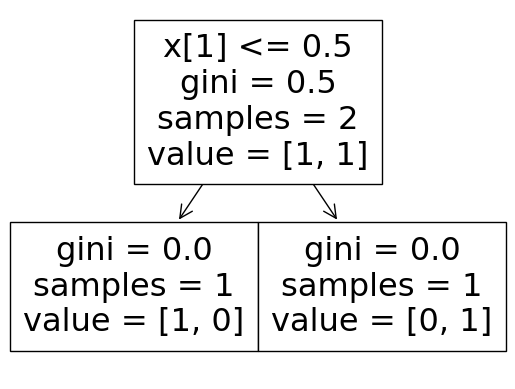

In [ ]:
plot_tree(model)

In [ ]:
model.get_depth()

1

In [ ]:
model.get_n_leaves()

2

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
model.set_params(criterion='entrophy')

DecisionTreeClassifier(criterion='entrophy')

[Text(0.5, 0.75, 'x[1] <= 0.5\nentrophy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'entrophy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'entrophy = 0.0\nsamples = 1\nvalue = [0, 1]')]

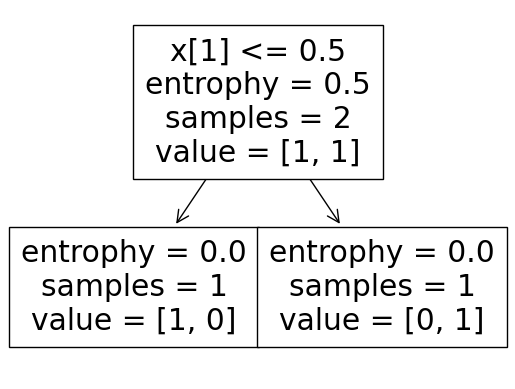

In [ ]:
plot_tree(model)

### for regression

In [ ]:
#data
X = np.arange(0, 10, 0.5).reshape(-1, 1)
y = np.sin(X).ravel() # ravel do the flatten thing

X[:5]

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ]])

In [ ]:
y

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112])

In [ ]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

model2 = DecisionTreeRegressor(max_depth=5)
model2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
X_test = np.arange(0, 10, 0.1).reshape(-1, 1)  # New input data
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

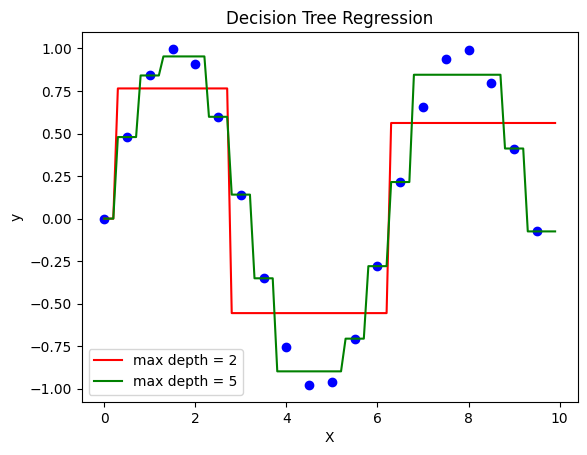

In [ ]:
# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, label='max depth = 2', color='red')
plt.plot(X_test, y_pred2, label='max depth = 5', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.75\nsquared_error = 0.434\nsamples = 20\nvalue = 0.194'),
 Text(0.25, 0.5, 'x[0] <= 0.25\nsquared_error = 0.113\nsamples = 6\nvalue = 0.638'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.038\nsamples = 5\nvalue = 0.765'),
 Text(0.75, 0.5, 'x[0] <= 6.25\nsquared_error = 0.451\nsamples = 14\nvalue = 0.003'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.144\nsamples = 7\nvalue = -0.555'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.134\nsamples = 7\nvalue = 0.562')]

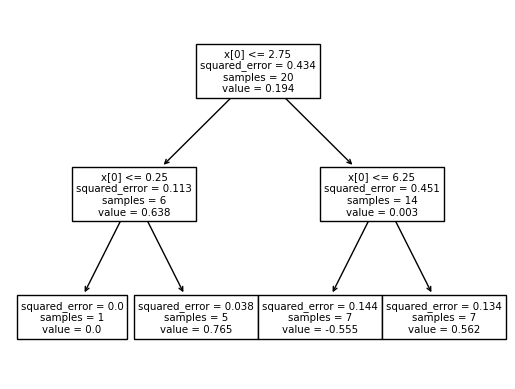

In [ ]:
plot_tree(model)

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Random Forest

<img src='https://media5.datahacker.rs/2022/08/26.jpg' height=400 />

**for classification**

In [ ]:
#data

X = [[0, 0], [1, 1]]
y = [0, 1]

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=2)
# n_estimators is the number of decision trees
# mentioned maximum depth of the decision tree

model.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [ ]:
model.predict([[2,2]])

array([1])

In [ ]:
member = model.base_estimator_ # the decision tree behind model
member

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [ ]:
model.estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**for regression**

just like above but for for Regression, base estimator is Decision tree Regressor

In [ ]:
# data

X = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2]
])

y = np.array([3, 5, 4, 6])

In [ ]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
model.predict([[3, 3]])

array([5.65])

In [ ]:
model.base_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeRegressor()

In [ ]:
model.feature_importances_

array([0.34796593, 0.65203407])

## Perceptron

<img src='https://miro.medium.com/v2/resize:fit:1400/1*gGmqkjA0VJCe5EhJnoQDNg.png' height=200 />

In [ ]:
# data

X = np.array([
    [1,2],
    [2,3],
    [1,3],
    [3,3]
])

y = np.array([0, 1, 0, 1])

In [ ]:
model = Perceptron(tol=1e-3)
model.fit(X, y)

Perceptron()

In [ ]:
model.predict(X)

array([0, 1, 0, 1])

In [ ]:
model.coef_

array([[ 4., -2.]])

In [ ]:
model.intercept_

array([-1.])

**from scratch**

In [ ]:
X

array([[1, 2],
       [2, 3],
       [1, 3],
       [3, 3]])

In [ ]:
y

array([0, 1, 0, 1])

In [ ]:
# setting constants

learning_rate = 0.1
n_iteration = 100
num_samples, num_features = X.shape
weights = np.zeros(num_features)
bias = 0

In [ ]:
# predict fuction

def predict(x):
  return 1 if x >= 0 else 0

In [ ]:
# gradient descent

for _ in range(n_iteration):
  for i in range(num_samples):
    linear_out = np.dot(X[i], weights) + bias
    prediction = predict(linear_out)

    if prediction != y[i]:
      update = learning_rate * (y[i] - prediction)
      weights += update * X[i]
      bias += update

In [ ]:
weights

array([ 0.2, -0.1])

In [ ]:
bias

-0.1

In [ ]:
# prediction

out = np.dot(X, weights) + bias
np.array([predict(x) for x in out])

array([0, 1, 0, 1])

## Kmeans Clustering

<img src='https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png' height=300 img/>

Randomely initialise n number of points in the data points , create cluster related to that, find the mean of cluster, change the points accordingly

In [ ]:
# data

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [ ]:
kmeans.predict([[0,0], [10,12]])

array([1, 0], dtype=int32)

In [ ]:
center = kmeans.cluster_centers_
center

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
kmeans.n_iter_

2

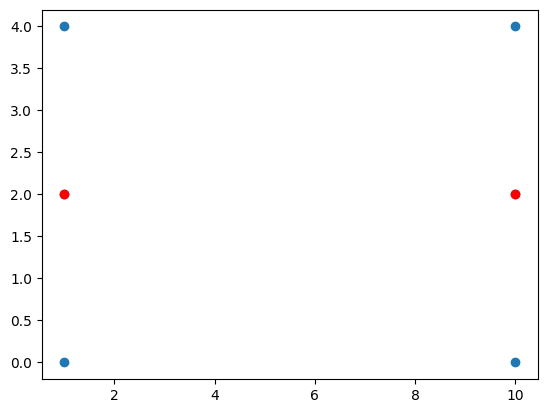

In [ ]:
plt.scatter(X[:, 0], X[:,1])
plt.scatter(center[:, 0], center[:, 1], color='red')

## DBSCAN

<img src='https://miro.medium.com/v2/resize:fit:1358/1*KqWII7sFp1JL0EXwJGpqFw.png' height=250/>

**Density-Based Spatial Clustering of Applications with Noise**

Get each data point, find core points based on eps (give maximum distance), find the other data points in that each cluster

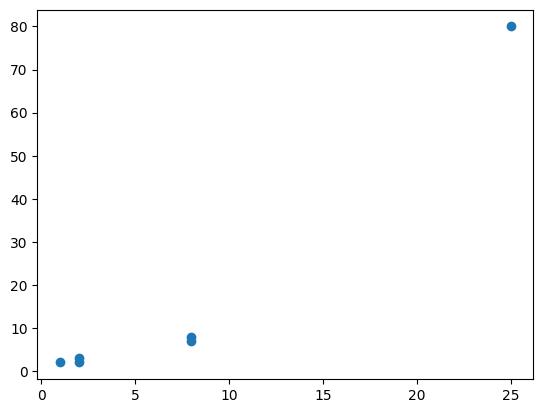

In [ ]:
# data

X = np.array([[1,2], [2,2], [2,3], [8,7], [8,8], [25, 80]])
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2)
# eps is the maximum distance between 2 sample
# min_samples is the number of samples in a neighbourhood for a point to be consider a core point

clustering.fit(X)

DBSCAN(eps=3, min_samples=2)

In [ ]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
clustering.n_features_in_

2

In [ ]:
clustering.core_sample_indices_     # Indices of core samples.

array([0, 1, 2, 3, 4])

In [ ]:
clustering.components_

array([[1, 2],
       [2, 2],
       [2, 3],
       [8, 7],
       [8, 8]])

## more

**Pending topics**

- ada boost
- Gradient boost
  - XGBoost
  - LightGBM
  - CatBoost
- Multi layer perceptron
- sklearn data sets
- tf idf
- K fold
- grid search and random search
- cross validate
- pipeline
- Normalize, standardize


## PCA

<img src='https://devopedia.org/images/article/139/4543.1548137789.jpg' height=450/>

In [ ]:
# data

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [ ]:
pca.singular_values_

array([6.30061232, 0.54980396])

In [ ]:
pca.mean_ # this data is standardized ; mean=0

array([0., 0.])

**from scratch**

In [ ]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [ ]:
# standardize the data

mean = np.mean(X, axis=0)
standardized_X = X - mean
standardized_X

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

In [ ]:
# covarience of matrix

cov_matrix = np.cov(standardized_X, rowvar=False)

In [ ]:
# eigen value and eigen vector

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('eigen values :', eigenvalues)
print('\neigen vectors :\n', eigenvectors)

eigen values : [7.93954312 0.06045688]

eigen vectors :
 [[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


In [ ]:
# sort the eigen values in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
# choose the top k eigenvectors

num_components = 2 # the parameter
top_eigenvectors = sorted_eigenvectors[:, :num_components]
top_eigenvectors

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

In [ ]:
pca_result = np.dot(standardized_X, top_eigenvectors)
pca_result

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])